In [1]:
%matplotlib widget

import sys
sys.path.insert(0, "../")
sys.path.insert(0, "../dataset_generator/")
from environments import Environments

import umap
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import stats
import analysis_tools

In [2]:
def plot_3d_proj(data, tags = None, cmap = "tab20c", title = "", axes = None):
    if axes is None:
        fig = plt.figure(figsize = (6,6))
        ax = fig.add_subplot(projection='3d')
    else:
        ax = axes
    ax.set_title(title)
    #norm = matplotlib.colors.Normalize(np.amin(tags), np.amax(tags))
    #col = matplotlib.cm.tab20c(norm(tags))
    ax.scatter(xs=data[:,0], ys=data[:,1], zs=data[:,2], c = tags, s =5, alpha = 0.5, cmap = cmap)
    ax.axis("off")
    
    if axes is None:
        return fig    

In [3]:
def fit_umap(data, components = 2):
    fit = umap.UMAP(n_components = components)
    transformed = fit.fit_transform(data)
    return transformed

In [7]:
model_name = f"../models/al1_10_l2_0"
path = f"../models/{model_name}"
model, params = analysis_tools.load_model(path, device = "cpu", model_type = "RNN")

In [8]:
env = Environments()
sequence = list(env.envs)
n_envs = len(sequence)
limits = 1.1*np.array([-1.5, 1.5, -1.5, 1.5])

In [9]:
x, r, v, c = analysis_tools.test_dataset(sequence, timesteps = 20000, context = params["context"])

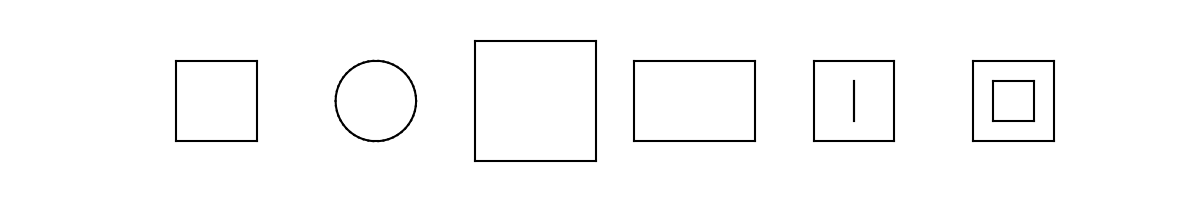

In [10]:
# plot the sequence walls
figsize = [len(sequence)*2, 2]
fig,axs = plt.subplots(1, len(sequence), figsize =figsize)
for i, wall in enumerate(sequence):
    axs[i].plot(*env.envs[wall].T, "k")
    axs[i].axis(limits)
    axs[i].set_aspect("equal")
    axs[i].axis("off")

In [12]:
dataset = [((x[0][i,None], x[1][i,None]), x[1][i,None]) for i in range(len(sequence))] # repackage
gs, ps, centers, preds = model.inference(dataset)

In [13]:
col = np.argmax(x[0][...,2:].detach().numpy(), axis = -1)/len(sequence) # context signal

In [14]:
transformed_gc = fit_umap(np.reshape(gs, (-1, gs.shape[-1])))
transformed_pc = np.array([fit_umap(p) for p in ps])

In [15]:
col = np.argmax(x[0][...,2:].detach().numpy(), axis = -1)/len(sequence) # context signal
cmap = matplotlib.cm.get_cmap('tab10')
c = np.zeros((len(sequence), col.shape[1], 4))
for i, val in enumerate(np.linspace(0, 1, 6)):
    c[i] = col.shape[1]*[cmap(val)]    

<ipython-input-15-f48daf19cb00>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('tab10')


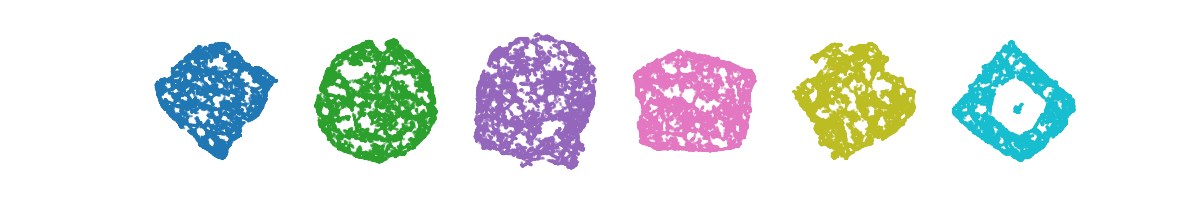

In [16]:
fig,axs = plt.subplots(1, len(sequence), figsize =figsize )
for i in range(len(sequence)):
    axs[i].scatter(transformed_pc[i,:,0], transformed_pc[i,:,1], s = 1, alpha = 0.5, c = c[i])
    axs[i].axis("off")
    axs[i].set_aspect("equal")
plt.show()

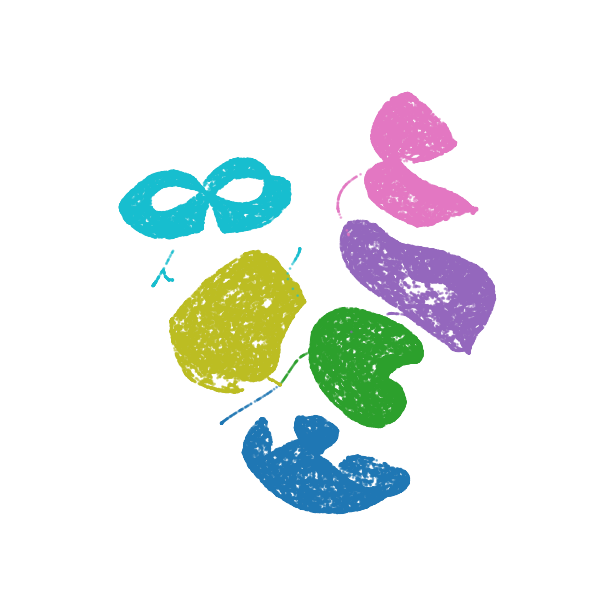

In [17]:
fig,ax = plt.subplots(1, 1, figsize =[6, 6])
ax.scatter(transformed_gc[:,0], transformed_gc[:,1], s = 1, alpha = 0.5, c = c.reshape(-1, c.shape[-1]))
ax.axis("off")
ax.set_aspect("equal")
plt.show()    

In [18]:
transformed_gc = fit_umap(np.reshape(gs, (-1, gs.shape[-1])), 3)

<ipython-input-2-3bdfac50f728>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xs=data[:,0], ys=data[:,1], zs=data[:,2], c = tags, s =5, alpha = 0.5, cmap = cmap)


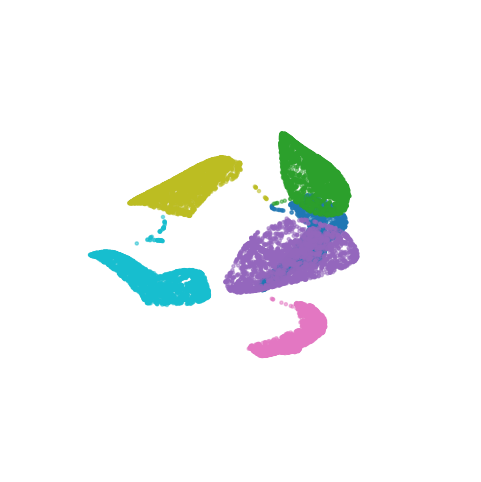

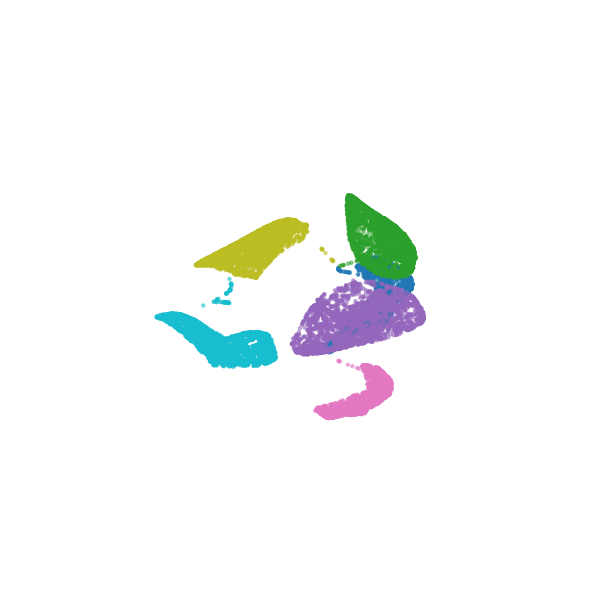

In [19]:
inds = np.random.randint(0, len(transformed_gc), 20000)
plot_3d_proj(transformed_gc[inds], tags = c.reshape(-1, c.shape[-1])[inds])

In [ ]:
c.shape